In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_absolute_error, d2_tweedie_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Xav/Other Projects/Insurance_MedicalCost/Data/Dataset of health insurance portfolio/Dataset of health insurance portfolio.csv')

display(df.head())

,ID,ID_policy,ID_insured,period,date_effect_insured,date_lapse_insured,date_effect_policy,date_lapse_policy,year_effect_insured,year_lapse_insured,...,C_H,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T,C_C
0,1_1,1,1,2017,15-06-1993,20-12-2017,15-06-1993,NaN,1993,2017.0,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
1,1_2,1,2,2017,15-06-1993,NaN,15-06-1993,NaN,1993,NaN,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
2,2_1,2,1,2017,16-06-1993,NaN,16-06-1993,NaN,1993,NaN,...,H6,100.0,94.0,26.0,11.0,85.0,7.0,1.0,100.0,C6
3,3_3,3,3,2017,15-06-1993,NaN,15-06-1993,NaN,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3_5,3,5,2017,15-06-1993,NaN,15-06-1993,NaN,1993,NaN,...,H6,99.0,81.0,32.0,34.0,69.0,9.0,4.0,98.0,C6


In [ ]:
df.isnull().sum()

,0
ID,0
ID_policy,0
ID_insured,0
period,0
date_effect_insured,0
date_lapse_insured,167181
date_effect_policy,0
date_lapse_policy,174568
year_effect_insured,0
year_lapse_insured,167181


In [ ]:
df["date_effect_insured"].agg(["min", "max"])

,date_effect_insured
min,01-01-1944
max,31-12-2018


In [ ]:
df['period'].unique()

array([2017, 2018, 2019])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228711 entries, 0 to 228710
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    228711 non-null  object 
 1   ID_policy             228711 non-null  int64  
 2   ID_insured            228711 non-null  int64  
 3   period                228711 non-null  int64  
 4   date_effect_insured   228711 non-null  object 
 5   date_lapse_insured    61530 non-null   object 
 6   date_effect_policy    228711 non-null  object 
 7   date_lapse_policy     54143 non-null   object 
 8   year_effect_insured   228711 non-null  int64  
 9   year_lapse_insured    61530 non-null   float64
 10  year_effect_policy    228711 non-null  int64  
 11  year_lapse_policy     54143 non-null   float64
 12  exposure_time         228711 non-null  float64
 13  lapse                 228711 non-null  int64  
 14  seniority_insured     228711 non-null  int64  
 15  

In [ ]:
# 1. Handle Lapse dates: Create a 'still_insured' flag
df['is_active'] = df['date_lapse_insured'].isnull().astype(int)

In [ ]:
# 2. Drop rows where essential socio-economic or climate data is missing
# This ensures every row has a 'C_C' code for our upcoming weather merge
essential_cols = ['C_H', 'C_GI', 'C_IE_T', 'C_C', 'IICIMUN']
df_clean = df.dropna(subset=essential_cols)

# 3. Verify how much data we kept
original_count = len(df)
new_count = len(df_clean)
percent_kept = (new_count / original_count) * 100

print(f"Original rows: {original_count}")
print(f"Cleaned rows: {new_count}")
print(f"We kept {percent_kept:.2f}% of the data.")

df_clean.info()

Original rows: 228711
Cleaned rows: 215428
We kept 94.19% of the data.
<class 'pandas.core.frame.DataFrame'>
Index: 215428 entries, 0 to 228710
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    215428 non-null  object 
 1   ID_policy             215428 non-null  int64  
 2   ID_insured            215428 non-null  int64  
 3   period                215428 non-null  int64  
 4   date_effect_insured   215428 non-null  object 
 5   date_lapse_insured    56151 non-null   object 
 6   date_effect_policy    215428 non-null  object 
 7   date_lapse_policy     49211 non-null   object 
 8   year_effect_insured   215428 non-null  int64  
 9   year_lapse_insured    56151 non-null   float64
 10  year_effect_policy    215428 non-null  int64  
 11  year_lapse_policy     49211 non-null   float64
 12  exposure_time         215428 non-null  float64
 13  lapse                 215428 non-null 

In [ ]:
# 4. DATA CLEANING: DROP REDUNDANT COLUMNS
# Since we created 'is_active', we no longer need the raw date/year lapse columns
cols_to_drop = [
    'date_lapse_insured', 'date_lapse_policy',
    'year_lapse_insured', 'year_lapse_policy'
]
df_clean = df_clean.drop(columns=cols_to_drop)

In [ ]:
df_clean.isnull().sum()

,0
ID,0
ID_policy,0
ID_insured,0
period,0
date_effect_insured,0
date_effect_policy,0
year_effect_insured,0
year_effect_policy,0
exposure_time,0
lapse,0


In [ ]:
# 5. THE ORIGINAL MERGE: ADDING CLIMATE CONTEXT
# We load the environmental centroids (Temperature, UV Index, etc.)
df_climate = pd.read_csv('/content/drive/MyDrive/Xav/Other Projects/Insurance_MedicalCost/Data/Dataset of health insurance portfolio/Centroid values of the climate clusters.csv')

In [ ]:
# We join the policyholders to their environment using 'C_C' (Cluster) and 'period' (Year)
df_final = pd.merge(
    df_clean,
    df_climate,
    left_on=['C_C', 'period'],
    right_on=['C_C', 'Year'],
    how='left'
)

In [ ]:
# Remove the redundant 'Year' column from the merge
df_final = df_final.drop(columns=['Year'])

In [ ]:
# 6. ACTUARIAL METRIC: LOSS RATIO
# Calculating the ratio of claims to premiums is the primary way insurers measure risk
df_final['loss_ratio'] = df_final['cost_claims_year'] / df_final['premium']

In [ ]:
# 7. FINAL AUDIT
print("--- PROJECT STATUS REPORT ---")
print(f"Total Rows Analyzed: {len(df_final)}")
print(f"Time Horizon: {df_final['period'].min()} - {df_final['period'].max()}")
print(f"Retention Rate (Mean): {df_final['is_active'].mean():.2%}")
print("\nNew Environmental Features Integrated:")
print(list(df_climate.columns[2:])) # Displays Temp, Precipitation, UV, etc.

--- PROJECT STATUS REPORT ---
Total Rows Analyzed: 215428
Time Horizon: 2017 - 2019
Retention Rate (Mean): 73.94%

New Environmental Features Integrated:
['Temperature', 'Precipitation', 'Wind', 'UV index', 'Armospheric Pressure']


In [ ]:
# Display the first few rows of your new master dataset
df_final.head()

,ID,ID_policy,ID_insured,period,date_effect_insured,date_effect_policy,year_effect_insured,year_effect_policy,exposure_time,lapse,...,C_GE_S,C_GE_T,C_C,is_active,Temperature,Precipitation,Wind,UV index,Armospheric Pressure,loss_ratio
0,1_1,1,1,2017,15-06-1993,15-06-1993,1993,1993,0.969749,1,...,14.0,96.0,C6,0,14.1,2.8,2.9,5.8,978.2,2.819609
1,1_2,1,2,2017,15-06-1993,15-06-1993,1993,1993,1.000000,2,...,14.0,96.0,C6,1,14.1,2.8,2.9,5.8,978.2,0.178441
2,2_1,2,1,2017,16-06-1993,16-06-1993,1993,1993,1.000000,2,...,1.0,100.0,C6,1,14.1,2.8,2.9,5.8,978.2,0.259000
3,3_5,3,5,2017,15-06-1993,15-06-1993,1993,1993,1.000000,2,...,4.0,98.0,C6,1,14.1,2.8,2.9,5.8,978.2,0.319263
4,3_6,3,6,2017,15-06-1993,15-06-1993,1993,1993,1.000000,2,...,51.0,19.0,C4,1,13.5,1.2,2.8,7.7,947.8,2.305164


Acturial Insights

In [ ]:
# 1. Analyze Costs by Climate Cluster
climate_risk = df_final.groupby('C_C')['cost_claims_year'].mean().sort_values(ascending=False)
print("--- Average Claim Cost by Climate Zone ---")
print(climate_risk)

--- Average Claim Cost by Climate Zone ---
C_C
C2    655.001463
C6    636.598527
C4    594.652103
C3    558.122801
C5    551.900281
C1    538.526716
Name: cost_claims_year, dtype: float64


In [ ]:
# 2. Analyze the Loss Ratio (Profitability) by Gender
gender_profit = df_final.groupby('gender')['loss_ratio'].mean()
print("\n--- Average Loss Ratio by Gender ---")
print(gender_profit)


--- Average Loss Ratio by Gender ---
gender
F    0.707074
M    0.586710
Name: loss_ratio, dtype: float64


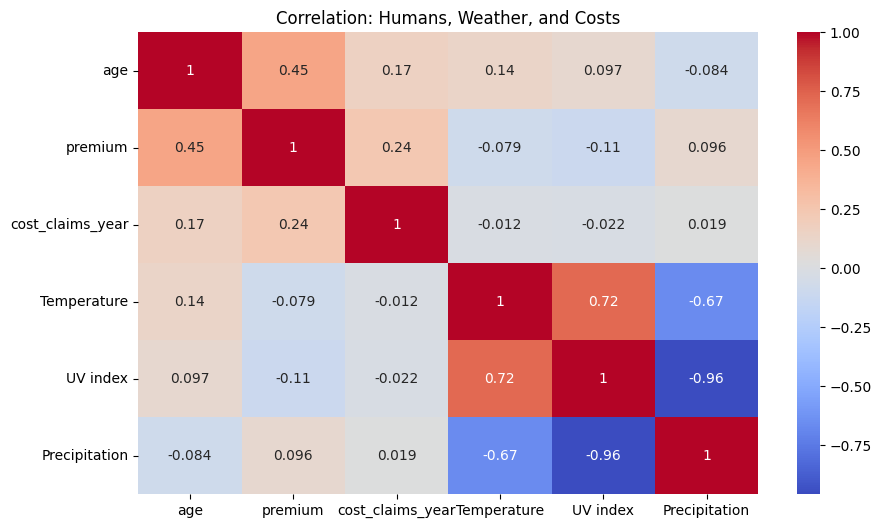

In [ ]:
# 3. Correlation Heatmap
# This shows which factors (Age, Temp, UV Index) actually move the cost

cols_for_corr = ['age', 'premium', 'cost_claims_year', 'Temperature', 'UV index', 'Precipitation']
plt.figure(figsize=(10, 6))
sns.heatmap(df_final[cols_for_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Humans, Weather, and Costs")
plt.show()

Advanced Feature Engineering

In [ ]:
# CREATE AGE BINS
# Insurance companies price risk based on life stages
bins = [0, 18, 35, 50, 65, 120]
labels = ['Minor', 'Young Adult', 'Adult', 'Senior', 'Retiree']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels)

In [ ]:
# ANALYZE RISK BY AGE GROUP
age_risk = df_final.groupby('age_group')['cost_claims_year'].mean()
print("--- Average Cost by Age Group ---")
print(age_risk)

--- Average Cost by Age Group ---
age_group
Minor           240.498549
Young Adult     410.370937
Adult           435.178776
Senior          674.296154
Retiree        1072.200126
Name: cost_claims_year, dtype: float64


/tmp/ipython-input-340560446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df_final.groupby('age_group')['cost_claims_year'].mean()


In [ ]:
# 1. Interaction: Age Group vs. Climate Cluster Costs
# This tells us if specific climates are riskier for specific ages
age_climate_cost = df_final.groupby(['age_group', 'C_C'], observed=False)['cost_claims_year'].mean().unstack()

print("--- Average Claim Cost: Age Group vs. Climate Cluster ---")
display(age_climate_cost)

--- Average Claim Cost: Age Group vs. Climate Cluster ---


C_C,C1,C2,C3,C4,C5,C6
age_group,,,,,,
Minor,193.482414,215.617338,242.448968,300.816419,196.155397,232.147552
Young Adult,391.593624,377.817520,366.868470,488.791197,358.963895,466.892986
Adult,418.101459,429.914106,385.462950,525.875906,397.201599,480.809255
Senior,671.989267,765.650070,598.542326,726.301262,580.279973,805.856292
Retiree,946.195786,1107.731400,965.992056,1253.296034,1085.869756,1446.946158


In [ ]:
# 2. Retention Analysis: Who is leaving the company?
# Higher mean = Higher retention (more people stay)
retention_by_age = df_final.groupby('age_group', observed=False)['is_active'].mean().sort_values(ascending=False)

print("\n--- Loyalty Score (Retention Rate) by Age Group ---")
print(retention_by_age)


--- Loyalty Score (Retention Rate) by Age Group ---
age_group
Retiree        0.852309
Senior         0.808123
Adult          0.701976
Minor          0.658688
Young Adult    0.655944
Name: is_active, dtype: float64


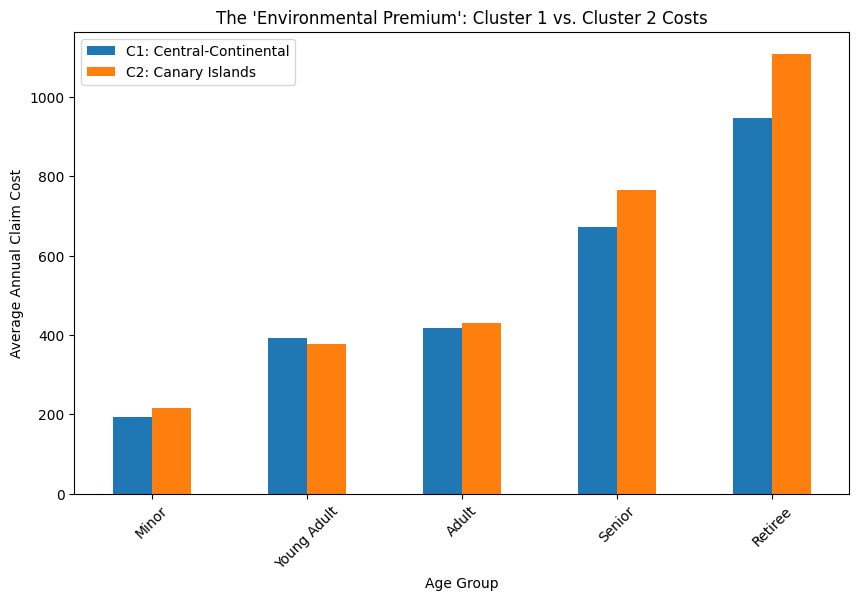

In [ ]:
# 3. Visualizing the "Canary Islands" (C2) Effect vs. Central Spain (C1)
import matplotlib.pyplot as plt

# We compare the most expensive cluster (C2) with the cheapest (C1)
comparison_df = age_climate_cost[['C1', 'C2']]
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("The 'Environmental Premium': Cluster 1 vs. Cluster 2 Costs")
plt.ylabel("Average Annual Claim Cost")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(["C1: Central-Continental", "C2: Canary Islands"])
plt.show()

Twiddie Model

Calculating Information Gain for all columns... please wait.


/tmp/ipython-input-1926347843.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_results.head(12).values, y=mi_results.head(12).index, palette='magma')


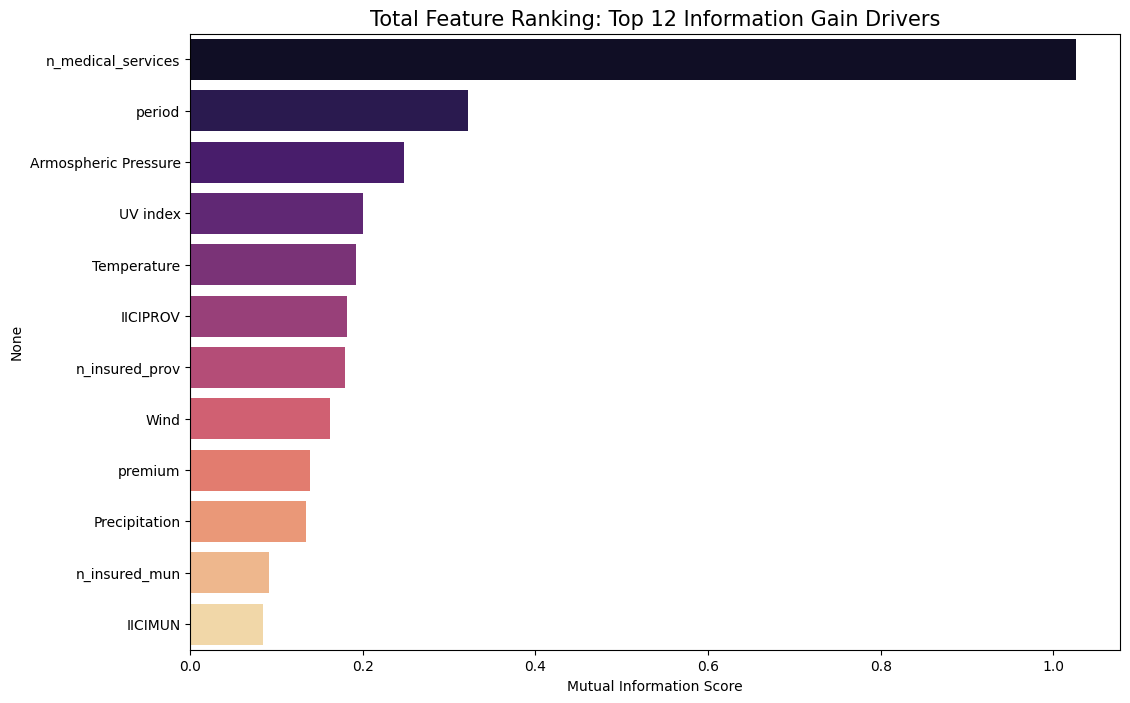

Top 12 Statistically Justified Features:
n_medical_services      1.026359
period                  0.321864
Armospheric Pressure    0.248130
UV index                0.199906
Temperature             0.191999
IICIPROV                0.181879
n_insured_prov          0.179122
Wind                    0.161346
premium                 0.138981
Precipitation           0.134226
n_insured_mun           0.091660
IICIMUN                 0.083904
dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PREPARE THE "ALL-COLUMN" DATASET
# We drop IDs and columns that "leak" the answer (like n_medical_services)
to_drop = ['ID', 'ID_policy', 'ID_insured', 'cost_claims_year', 'loss_ratio']
X_all = df_final.drop(columns=to_drop)
y = df_final['cost_claims_year']

# 2. ENCODE EVERYTHING
# Convert all text/categorical data into numbers so MI can process them
X_all_numeric = X_all.copy()
le = LabelEncoder()
for col in X_all_numeric.select_dtypes(include=['object', 'category']).columns:
    X_all_numeric[col] = le.fit_transform(X_all_numeric[col].astype(str))

# 3. CALCULATE MI SCORES FOR ALL COLUMNS
# This might take a minute because there are 40+ columns
print("Calculating Information Gain for all columns... please wait.")
mi_all = mutual_info_regression(X_all_numeric, y, random_state=42)

# 4. RANK AND SELECT THE TOP 12
mi_results = pd.Series(mi_all, index=X_all.columns).sort_values(ascending=False)

# 5. VISUALIZE THE TOP RANKINGS
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_results.head(12).values, y=mi_results.head(12).index, palette='magma')
plt.title("Total Feature Ranking: Top 12 Information Gain Drivers", fontsize=15)
plt.xlabel("Mutual Information Score")
plt.show()

print("Top 12 Statistically Justified Features:")
print(mi_results.head(12))

In [ ]:
# 1. Select the Final 12 features
final_features = [
    'age', 'seniority_insured', 'is_active',
    'Armospheric Pressure', 'UV index', 'Temperature', 'Wind', 'Precipitation',
    'IICIPROV', 'IICIMUN', 'C_GI', 'C_IE_T'
]

X = df_final[final_features].copy()
y = df_final['cost_claims_year']

# 2. Encode categorical socio-economic markers (if they aren't numbers yet)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['C_GI', 'C_IE_T']:
    X[col] = le.fit_transform(X[col].astype(str))

# 3. Handle any NaNs that might have appeared in regional columns
X = X.fillna(X.median())

# 4. Train/Test Split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Final Feature Set Ready for Modeling.")
print(f"Training on {X_train.shape[0]} samples with {X_train.shape[1]} features.")

Final Feature Set Ready for Modeling.
Training on 172342 samples with 12 features.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Create a Pipeline that Scales data then runs the Model
# This is the "Pro" way to ensure your test data is scaled exactly like your training data
pipeline = make_pipeline(
    StandardScaler(),
    TweedieRegressor(power=1.5, link='log', max_iter=5000)
)

# 2. Fit the Pipeline
pipeline.fit(X_train, y_train)

# 3. Predict
y_pred = pipeline.predict(X_test)

# 4. Evaluate the Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
d2_score = d2_tweedie_score(y_test, y_pred)

print("--- Final Model Performance ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"D^2 Score (Tweedie Deviance): {d2_score:.4f}")

# 4. Get the scaled weights
# Access the model inside the pipeline
final_model = pipeline.named_steps['tweedieregressor']
coef_df = pd.DataFrame({'Feature': final_features, 'Weight': final_model.coef_})
print(coef_df.sort_values(by='Weight', ascending=False))

--- Final Model Performance ---
Mean Absolute Error (MAE): $635.52
Root Mean Squared Error (RMSE): $1596.12
D^2 Score (Tweedie Deviance): 0.0321
                 Feature    Weight
0                    age  0.480003
2              is_active  0.041414
8               IICIPROV  0.038604
6                   Wind  0.032821
3   Armospheric Pressure  0.005962
11                C_IE_T  0.002252
9                IICIMUN -0.009905
10                  C_GI -0.015278
1      seniority_insured -0.020545
7          Precipitation -0.041744
4               UV index -0.055174
5            Temperature -0.075616


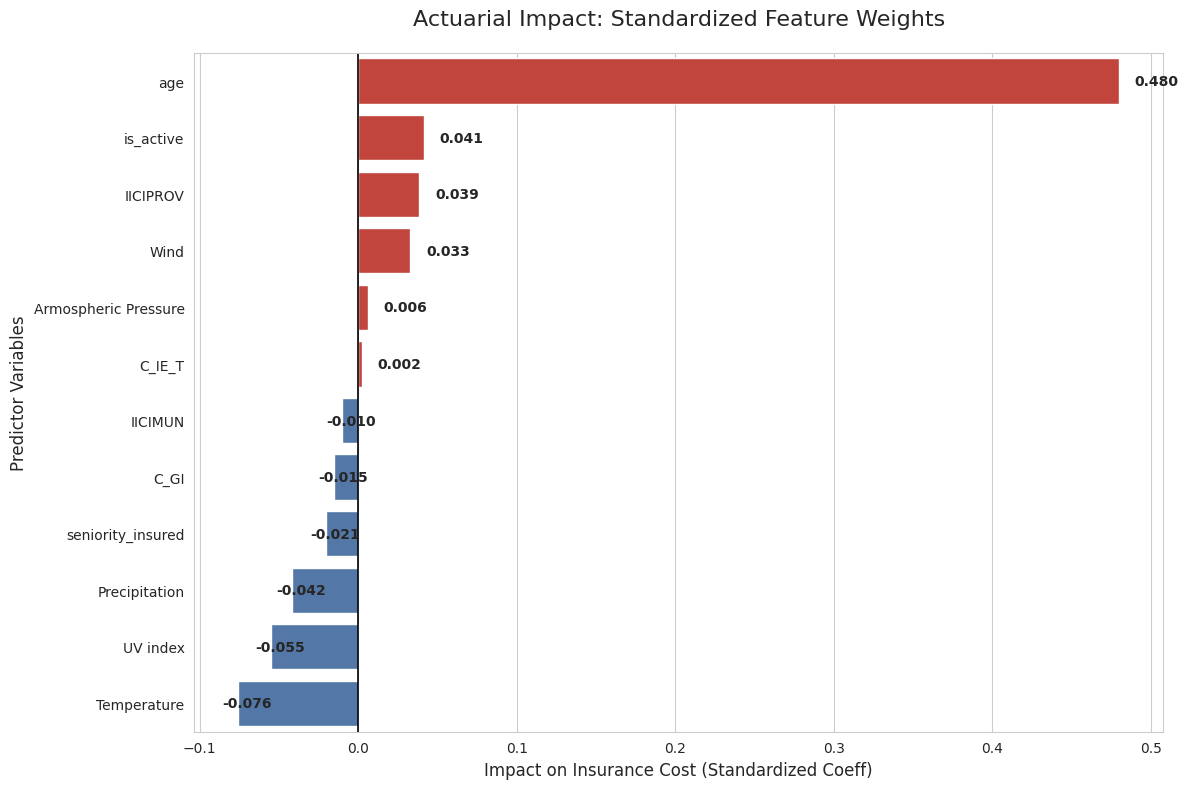

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort weights for a clean visual hierarchy
coef_df = coef_df.sort_values(by='Weight', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Assign colors: Red for Risk (Positive), Blue for Protective (Negative)
# We map the colors to a 'Direction' column to satisfy the new Seaborn requirements
coef_df['Direction'] = ['Risk Factor' if x > 0 else 'Protective Factor' for x in coef_df['Weight']]
color_map = {'Risk Factor': '#d73027', 'Protective Factor': '#4575b4'}

# The 'hue' assignment fixes the FutureWarning
ax = sns.barplot(
    x='Weight',
    y='Feature',
    data=coef_df,
    hue='Direction',
    palette=color_map,
    dodge=False,
    legend=False
)

# Add a vertical line at 0 for clarity
plt.axvline(x=0, color='black', linestyle='-', linewidth=1.2)

# Professional labeling
plt.title('Actuarial Impact: Standardized Feature Weights', fontsize=16, pad=20)
plt.xlabel('Impact on Insurance Cost (Standardized Coeff)', fontsize=12)
plt.ylabel('Predictor Variables', fontsize=12)

# Adding the weight values as text labels on the bars
for i, row in enumerate(coef_df.itertuples()):
    # Offset the text slightly based on if the bar is positive or negative
    x_pos = row.Weight + (0.01 if row.Weight > 0 else -0.01)
    ha = 'left' if row.Weight > 0 else 'right'
    plt.text(x_pos, i, f'{row.Weight:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 1. Create a Pipeline (Scaling is mandatory for tuning to be fair)
tuning_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tweedie', TweedieRegressor(link='log', max_iter=5000))
])

# 2. Define the "Grid" of parameters to test
# We test different power values (the distribution shape)
# and alpha (how much we penalize complex models)
param_grid = {
    'tweedie__power': [1.1, 1.3, 1.5, 1.7, 1.9],
    'tweedie__alpha': [0.1, 0.5, 1.0, 2.0]
}

# 3. Initialize Grid Search
# cv=3 means it will test each version 3 times on different data chunks
grid_search = GridSearchCV(
    tuning_pipeline,
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1 # Uses all your CPU cores for speed
)

# 4. Run the Search
print("Searching for the optimal actuarial parameters...")
grid_search.fit(X_train, y_train)

# 5. Results
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Final Evaluation
y_pred_tuned = best_model.predict(X_test)
tuned_d2 = d2_tweedie_score(y_test, y_pred_tuned)
print(f"Tuned D^2 Score: {tuned_d2:.4f}")

Searching for the optimal actuarial parameters...
Best Parameters: {'tweedie__alpha': 1.0, 'tweedie__power': 1.9}
Tuned D^2 Score: 0.0264
